# Iris Dataset

## Introduction

The Iris flower data set or Fisher's Iris data (also called Anderson's Iris data set) set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper "The use of multiple measurements in taxonomic problems". The data set consists of 3 species of Iris plants (Setosa, Versicolor and Virginica). Edgar Anderson collected 50 samples of the flower, of which each was a different species. He collected 150 in total. For each sample he measured the sepal length and width, and the petal length and width along with the corresponding species. The data contains the sepal length and width, and the petal length and width.

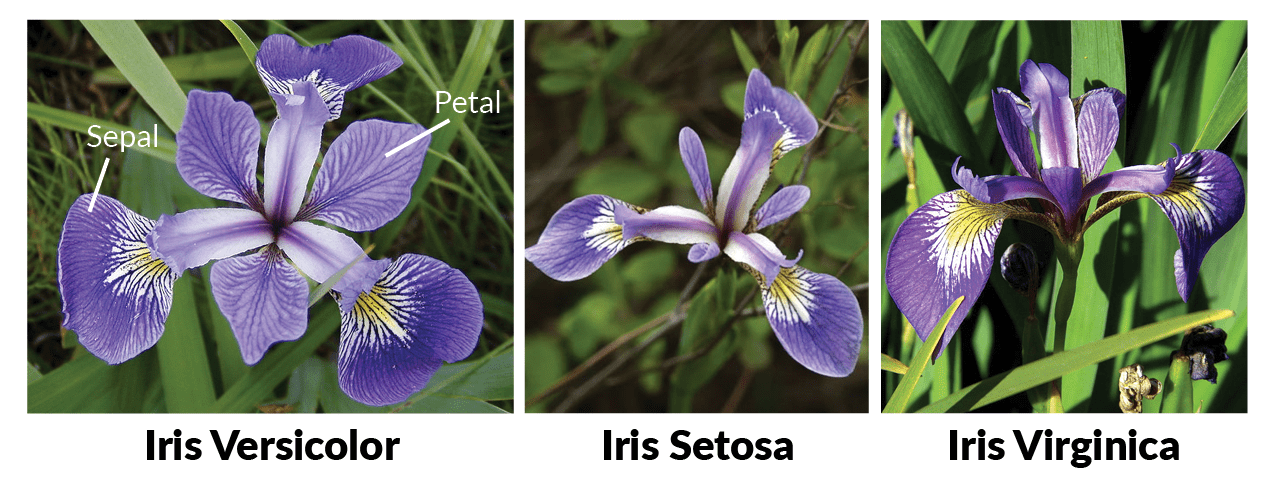

## Iris dataset file
This Iris dataset contains a set of 150 records which represent three iris species (Iris setosa, Iris versicolor and Iris virginica) with 50 samples each. I took the dataset file from the Scikit-learn library on my computer:
D:\\Coding\\Anaconda\\lib\\site-packages\\sklearn\\datasets\\data\\iris.csv
Scikit-learn is a machine learning library

The columns that represent records mentioned above from left to right are:

- Sepal Length
- Sepal Width
- Petal Length
- Petal Width
- Target(Species)

The 150 referes to the number of samples, the 4 refers to the number of features and the species names are also present in the csv. The layout of this CSV is different to the standard layout for the Iris dataset in a CSV and this is because I used the Scikit-learn library which uses NumPy to read and convert the data to NumPy arrays. One other thing to note is that the species will be refered to as the target throughout this project and each species of Iris will be assigned a numerical value. Iris Setosa is 0, Iris Versicolor is 1 and Iris Virginica is 2. This is machine learning terminology which will be discussed more later in the project.

## Code Used to Analyse the Dataset

In this section I will give an explanation of the code that I used, the libraries that were imported and the visualisation used.

### Imported libraries and Modules

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

NumPy is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more.

Pandas is a popular Python package for data science, and with good reason: it offers powerful, expressive and flexible data structures that make data manipulation and analysis easy, among many other things. The DataFrame is one of these structures.

Matplotlib is a comprehensive visualisation library in Python, built on NumPy arrays, for creating static, animated and interactive 2D plots or arrays. [06] [07]
matplotlib.pyplot is a state-based interface to matplotlib. It provides a MATLAB-like way of plotting. pyplot is mainly intended for interactive plots and simple cases of programmatic plot generation. [08]

Seaborn is a library for making statistical graphics in Python. It is built on top of matplotlib and closely integrated with pandas data structures. [09]
Working with DataFrames is a bit easier with the Seaborn because the plotting functions operate on DataFrames and arrays that contain a whole dataset. [10]
Elite data science has interesting tutorial on seaborn presented on a famous Pokemon cartoon based dataset.

Scikit-learn is an open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection and evaluation, and many other utilities. It is built on NumPy, SciPy, and matplotlib. It features various classification, regression and clustering algorithms. I imported the following individual modules from the library: load_iris, KNeighborsClassifier, LogisticRegression, train_test_split. load_iris contains the famous Iris dataset as a dictionary object

### Libraries cheat sheets
List of usefull cheat sheets for libraries used in this project:

- NumPy 1
- NumPy 2
- pandas
- Matplotlib
- Seaborn

### Properties of the Scikit-learn Iris dataset
The first thing that I did with the Iris data set was to save the imported dataset was to save it into an object called iris.

In [57]:
iris = load_iris()
type(iris)

sklearn.utils.Bunch

We can see from the above code that the object iris is of type sklearn.utils.Bunch. Bunch objects are sometimes used as an output for functions and methods. They extend dictionaries by enabling values to be accessed by key. We could print the whole iris objcect to see all the information in it. I've done this is done in the analysis file. Since iris is a dictionary object we can use keys() to see all of the keys in the dataset.

In [58]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

This object contains everything that I will need to analyse the data. For the next section I'm going to use iris.data as my pandas dataframe. In the analysis file I printed iris.data which is a NumPy array of the (from left to right) Sepal Length, Sepal Width, Petal Length, Petal Width. Below shows that the key feature_names are the measurements:

In [59]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### Converting the data into a Pandas dataframe
I used pd.DataFrame which is used to create a dataframe and called it df which is a variable object. I specified the values for each column. 

In [60]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.keys()

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

This returns the Index which is the feature names. Pandas uses zero-based integer indices in the Datafrmae, so columns = iris.feature_nameswas used to make the feature_names key an index column from the dictionary object iris. The dataframe is now set up to analyse the iris dataset.
A summary of all of the data can be seen in the analysis file. Below are some of the pandas operations that I used in the analysis. 

### Head

In [61]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


This opertation returns the first n rows for the object based on position. It is useful for quickly testing if your object has the right type of data in it. If no argument is passed through then n=5.
We can include the target as another column in this dataframe by by using the [] brackets with the new column name at the left side of the assignment.

In [62]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Describe

In [63]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


This operation gives the summary of the numeric values in the dataset. It calculates the mean, standard deviation, minimum and maximum value, and also 1st, 2nd and 3rd percentile of the columns with numeric value. [18] Not that for the target the calculations are meaningless because describe() is just doing the calculations for the numbers 0, 1 and 2.

### groupby().size

In [64]:
df.groupby('target').size()

target
0    50
1    50
2    50
dtype: int64

This operation shows Number of rows in each group as a Series. We can see that there are 50 entries for each species.

### Other pandas operations
The other operations I used were df.tail(), df.dtypes and df.info() and they can be viewed in the analysis file.

## Data Visualistaton (Plots)

### Preping the Data Using a Matrix Transpose

I added 4 histograms to the project using Matloplib. Sepal length, sepal width, petal lenght and petal width. As mentioned earlier, the species in the dataset are numerical. Iris Setosa is 0, Iris Versicolor is 1 and Iris Virginica is 2. Before plotting the data I needed to perform a Transpose which is a Matrix operation on the iris data. Transposing flips a matrix over its diagonal. It switches the row and column indices of the first matrix by producing another matrix. Since iris.data is a NumPy array, it separates the array into 4 different arrays (4 dimensions), so all of the sepal length data (element 0) is in the first array, all of the sepal width data (element 1) is in the second array etc. The below object features denotes this list of lists. I then I then made a separate varibale for each of the 4 features using the numerical element numbers of the list which can be seen below.

In [65]:
features = iris.data.T

sepal_length = features[0]
sepal_width = features[1]
petal_length = features[2]
petal_width = features[3]

sepal_length_label = iris.feature_names[0]
sepal_width_label = iris.feature_names[1]
petal_length_label = iris.feature_names[2]
petal_width_label = iris.feature_names[3]

### Histograms

Text(0, 0.5, 'Frequency')

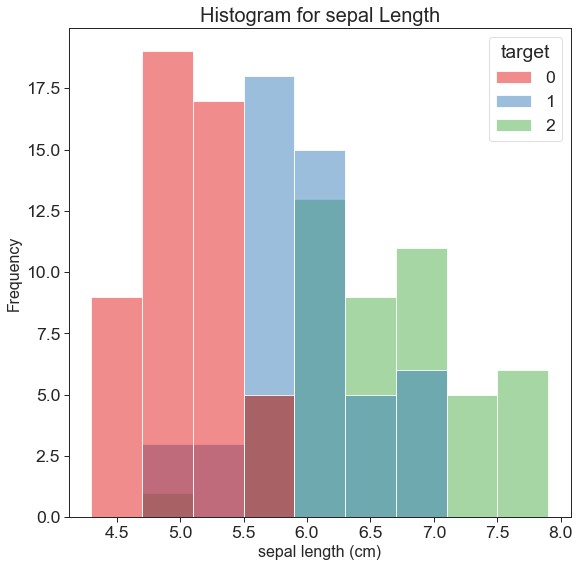

In [66]:
sns.set_style("ticks")
sns.set_context("paper", font_scale = 2)
plt.figure(figsize = (9, 9))
sns.histplot(data=df, x=sepal_length, hue="target", palette = "Set1")
plt.title("Histogram for sepal Length", size = 20)
plt.xlabel(sepal_length_label, size = 16)
plt.ylabel("Frequency", size = 16)

Text(0, 0.5, 'Frequency')

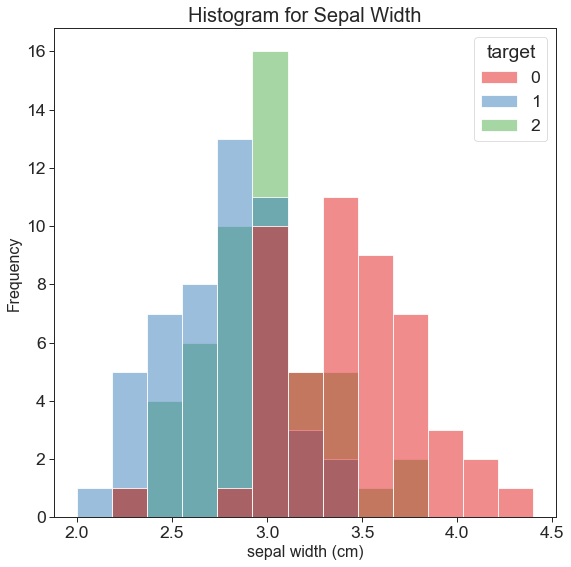

In [67]:
sns.set_style("ticks")
sns.set_context("paper", font_scale = 2)
plt.figure(figsize = (9, 9))
sns.histplot(data=df, x=sepal_width, hue="target", palette = "Set1")
plt.title("Histogram for Sepal Width", size = 20)
plt.xlabel(sepal_width_label, size = 16)
plt.ylabel("Frequency", size = 16)

Text(0, 0.5, 'Frequency')

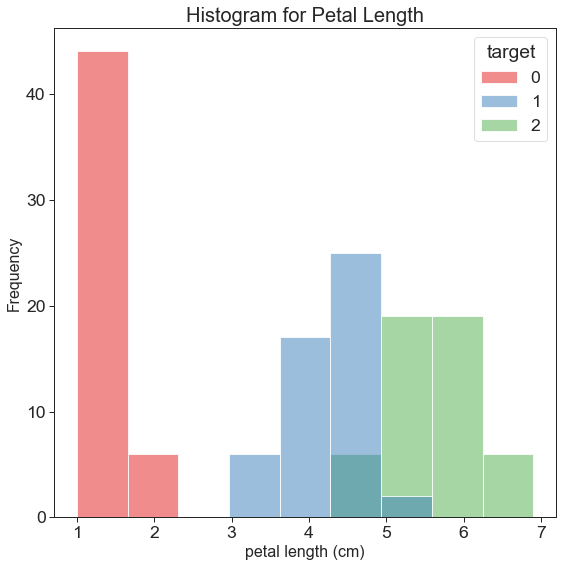

In [68]:
sns.set_style("ticks")
sns.set_context("paper", font_scale = 2)
plt.figure(figsize = (9, 9))
sns.histplot(data=df, x=petal_length, hue="target", palette = "Set1")
plt.title("Histogram for Petal Length", size = 20)
plt.xlabel(petal_length_label, size = 16)
plt.ylabel("Frequency", size = 16)

Text(0, 0.5, 'Frequency')

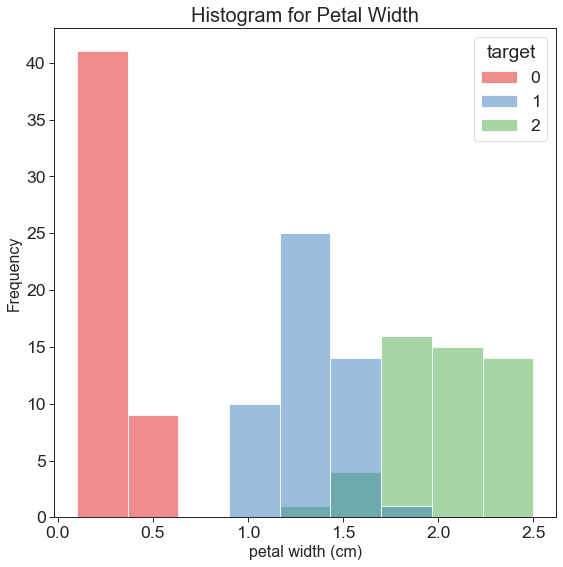

In [69]:
sns.set_style("ticks")
sns.set_context("paper", font_scale = 2)
plt.figure(figsize = (9, 9))
sns.histplot(data=df, x=petal_width, hue="target", palette = "Set1")
plt.title("Histogram for Petal Width", size = 20)
plt.xlabel(petal_width_label, size = 16)
plt.ylabel("Frequency", size = 16)

I set hue to the target (features) for these histograms. Hue is a grouping variable that will produce points with different colors. In other words, I grouped the plots into their categories. We can see from the histograms that Iris Setosa (0) has a much smaller petal length and petal width than the other 2 species. For Petal length and width, Virginica (2) has the biggest petal length and width and Versicolor (1) is in the middle. There is a bit of overlap between Virginica and Versicolor so they can't be separated. For sepal length and width Setosa (0) has the smallest sepal length and the largest sepal width and so it can be pretty easily separated from the other 2 but Virginica (2) and Versicolor (1) have too much overlap. This is why the colours get mixed together.

### Scatterplots

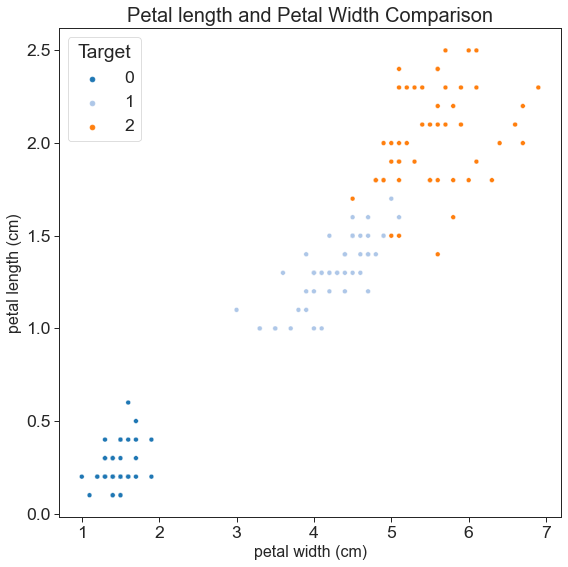

In [70]:
sns.set_style("ticks")
sns.set_context("paper", font_scale = 2)
plt.figure(figsize = (9, 9))
sns.scatterplot(x = petal_length, y = petal_width, data = df, marker = "o", hue = "target", palette = "tab20")
plt.title("Petal length and Petal Width Comparison", size = 20)
plt.xlabel(petal_width_label, size = 16)
plt.ylabel(petal_length_label, size = 16)
plt.legend(title="Target", loc=0)

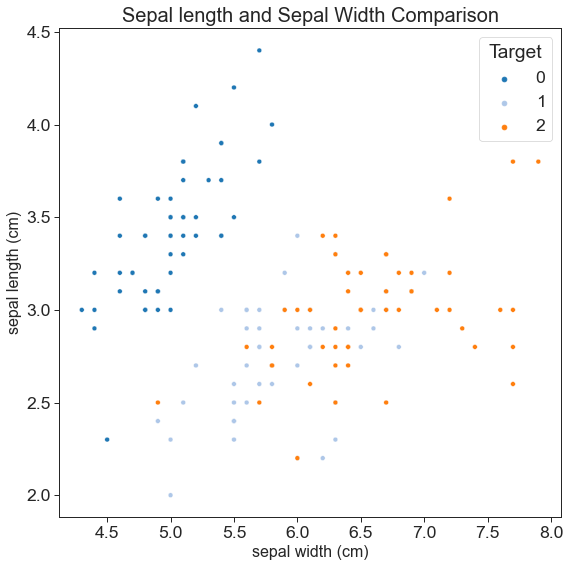

In [71]:
sns.set_style("ticks")
sns.set_context("paper", font_scale = 2)
plt.figure(figsize = (9, 9))
sns.scatterplot(x = sepal_length, y = sepal_width, data = df, marker = "o", hue = "target", palette = "tab20")
plt.title("Sepal length and Sepal Width Comparison", size = 20)
plt.xlabel(sepal_width_label, size = 16)
plt.ylabel(sepal_length_label, size = 16)
plt.legend(title="Target", loc=0)

Hue was again set to target for these plots. We can see from the scatterplots that Iris Setosa (0) can be separated by petal length and width. It has smaller petals in general than the other 2. Virginica (2) has the biggest petal length and width and Versicolor (1) is in the middle. For sepal length and width Setosa (0) has the smallest sepal length and the largest sepal width and so it can be pretty easily separated from the other 2 but Virginica (2) and Versicolor (1) have too much overlap. This corresponds to the histogram data above

### Pairplot

<Figure size 864x864 with 0 Axes>

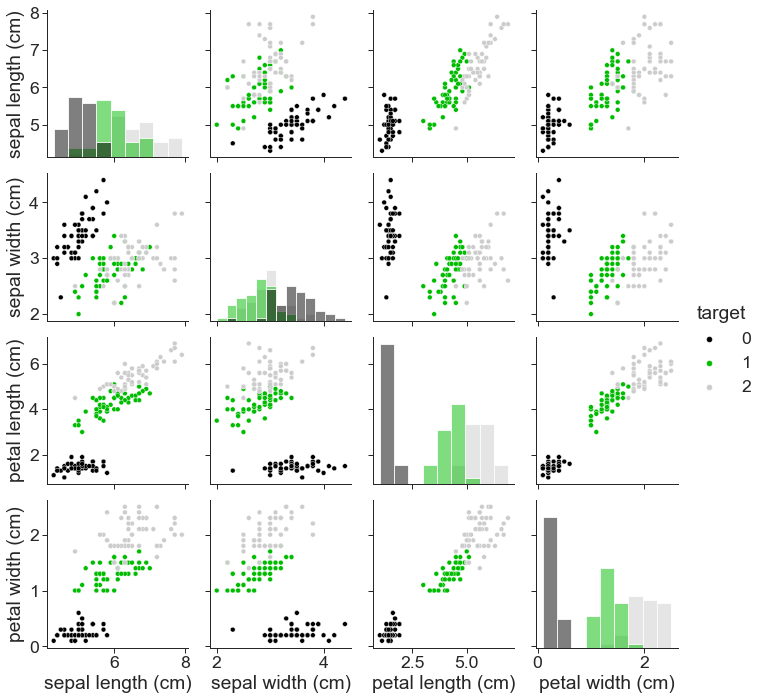

In [72]:
plt.figure(figsize = (12,12))
sns.set_style("ticks")
sns.set_context("paper", font_scale = 2)
sns.pairplot(df, hue = "target", diag_kind = "hist", palette = "nipy_spectral")

A pairplot shows pairwise relationships in datasets. Hue was again set to target for these plots. Since there are 4 features in this dataset the plot is a 4x4 grid. The default diagonal plot is KDE (Kernel density estimation), but in this case it is changed to histogram with the parameter diag_kind. For example, if you wanted to see petal length against petal width you would look at the 3rd column on the bottom of the grid, or the 4th column on the 3rd row (some plots are duplicates).

### Heatmap

In [73]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


To set up the heatmap I used the corr() operator which calculates the relationship between each column in the data set (df).

<AxesSubplot:>

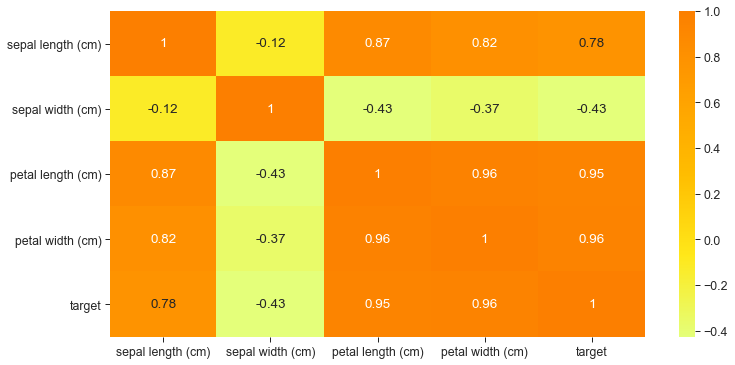

In [74]:
plt.figure(figsize = (12,6))
sns.set_style("ticks")
sns.set_context("paper", font_scale = 1.4)
sns.heatmap(df.corr(), annot=True, cmap='Wistia')

I then passed df.corr() into the seaborn heatmap plot. The heatmap shows variation in the data which is portrayed using a color palette. So we can see that petal length and petal width have a very high correlation. Petal lenght and sepal length are also highly correlated. We can ignore the target in this plot because they are just the categories. We can also ignore all the ones as they are just the features corresponding to themselves.

## Training a machine model with scikit-learn

In 1936, Sir Ronald Fisher wrote a paper about the Iris dataset, specifically about how a technique called **Linear Discriminant Analysis** could be used to accurately distinguish the three species from one another using only the sepal and petal measurements. This is known as a supervised learning problem because we are attempting to predict the species of the given Iris using the available data. This is supervised learning, because teh program is trying to learn the relationship between the data (the iris measurements) and the outcome, which is the species of Iris. The Iris dataset has become a famous dataset for machine learning because it turns out to be an easy supervised learning task. There is a strong relationship between the measurements and the species, and thus various machine learning models can accurately predict the species given the measurements. Because the Iris dataset is so popular as a **toy dataset**, it has been built into the **scikit-learn library.** In this project I already loaded the Iris data from scikit-learn. I will now demonstrate how I used a machine learning model to predict species using the iris measurements.

I started by writing:

In [75]:
from sklearn.datasets import load_iris

This imports the load_iris function from the sklearn.datasets module. This is because the convention in scikit-learn is to import individual modules, classes or functions instead of importing scikit-learn as a whole.  I then ran the load_iris function and saved the return value in an object called iris.

In [76]:
iris = load_iris()
type(iris)

sklearn.utils.Bunch

We saw earlier that the iris object is a special container called a "bunch", which is sci-kit learn's special object type for storing datasets and their attributes.

I'm now going to introduce some important machine learning terminology that I'll be using throughout this project. Each row is known as an observation. Some equivalent terms are sample, example, instance and record. We can say that the Iris dataset has 150 observations. Each column is know as a feature. Some equivalent terms are predictor, attribute, independent variable, input, regressor and covariated. We can say that the Iris dataset has 4 features. In my analysis program, I printed out an attribute of the iris object called `feature_names`.

In [77]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


This represents the names of the four features. They can also be imagined as the column headers for the data. I also printed out two more attributes called `target` and `target_names`. 

In [78]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [79]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


The target represents what I am going to predict. A 0 represents Setosa, a 1 represents Versicolor and a 2 represents Virginica as mentioned previously. Some equivalent terms for target are **response**, outcome, outcome, label, dependent variable. I will use the term response throughout this project.

The last pieces of terminology that will be used are the two types of supervised learning, which are **classification** and **regression**. A classification problem is one in which the response being predicted is categorical, meaning that its values are in a **finite**, **unordered set**. Predicting the species of Iris is an example of a classification problem, as is predicting if an email is spam or not. In contrast, a regression problem is one in which the response being predicted is **ordered** and **continuous**, such as the price of a house or the height of a person. When looking at `iris.target`, we might wonder how we can tell that this is a classification problem and not a regression problem, since all we can see are the numbers 0, 1 and 2. The answer is that we cannot tell the difference. As we explore the problem, we have to understand how the data is encoded and decide whether the response variable is suited for **classification** or **regression**. In this case we know that the numbers 0, 1 and 2 represent unordered categories, and thus we know to use classification techniques and not regression techniques in order to solve this problem.

### Requirements for working with data in scikit-learn

The first step in machine learning is for the model to learn the relationship between the **features** and the **response**. Firstly, we need to make sure that the features and response are in the form that scikit-learn expects. There are four key requirements to keep in mind which are as follows:

1. Scikit-learn expects the **features** and the **response** to be passed into the machine learning model as **separate objects.** `iris.data` and `iris.target` satisfy this condition since they are stored separately.
2. Scikit-learn only expects to see numbers in the **features** and **response** objects. This is why `iris.target` is stored as zero's, one's and two's instead  of the strings setosa, versicolor and virginica. In scikit-learn, the response object should always be numeric regardless of whether it is a regression problem or a classification problem.
3. Scikit-learn expects the **features** and the **response** to be stored as **NumPy** arrays. NumPy is a library for scientific computing that implements a homogenous, multidimensional array knows as an ndarray that has been optimised for fast computation. Both `iris.data` and `iris.target` are already stored as ndarrays. 
4. The feature and response objects are expected to have certain shapes. Specifically, the feature obkect should have two dimensions in which the first dimension represented by rows is the number of observations, and the second dimension, represented by columns is the number of features. All NumPy arrays have a shape attribute and so we can verify that the shape of `iris.data` is 150x4. The response object is expected to have a single dimension, and that dimension should have the same magnitude as the first dimension of the feature object. In other words, there should be one response corresponding to each observation. We can verify that the shape of `iris.target` is simply 150. 

In [80]:
print(type(iris.data))
print(type(iris.target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [81]:
print(iris.data.shape)

(150, 4)


In [82]:
print(iris.target.shape)

(150,)


I have now verified that `iris.data` and `iris.target` meet scikit-learn's four requirements for feature and response objects. The scikit-learn convention is for the feature data to be stored in an object named 'X', and for the response data to be stored in an object named 'y'. We'll store `iris.data` in 'X' and `iris.target` in 'y'. The 'X' is capitalised because it represents a matrix and the 'y' is lower case because it represents a vector. 

In [83]:
X = iris.data

y = iris.target

### K-nearest neighbors (KNN) classification
Before I go any further into machine learning and how we can train it to choose the correct species, let's discuss how we as humans would approach this task. Specifiacally, how would we prdict the species of an unknow Iris if we knew the measurements? When looking at the data, we would notice that the three Iris species in the dataset appear to have somewhat dissimilar measurements. Looking at the Plots in the first part of this project, if we had an unkown iris with 4 measurements we could predict that it is a Setosa easily enough if it fell had a small petal length and petal width. In other words, if it fell on that part of the scatter plot or histogram. The process I just described is similar to how the K-nearest neighbours classification model works. The steps of K-nearest neighbours, or KNN, are as follows. 
1. First we pick a value for K such as 5. I'll discuss later how to choose this value.
2. Second, the model searches for the 5 observations in the training data that are nearest to the measurements of the unknown Iris. Using a scatterplot exaple again, the model calculates the numerical distance between the unknown Iris's point on the plot and each of the 150 known Irises and selects the 5 known Irises with the smallest distance to the unknown Iris's point. The **euclidean distance** (the length of a line segment between the two points), is often used as the disntance metric.
3. Third, the response values of the 5 nearest neighbours are computed, and whichever response value is the most popular is used as the predicted response value for the unknown Iris. Let's look at some visualisations.

#### Example training data

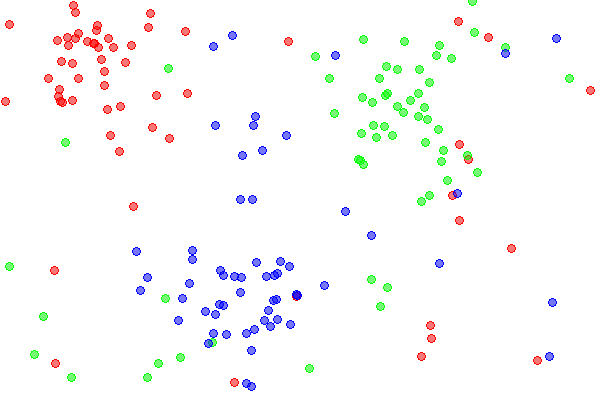

The above is an example of training data. This dataset has two numerical features represented by the X and Y coordinates. Each point represents an observation, and the colour of the point represents it's response class(target).

#### KNN classification map (K=1)

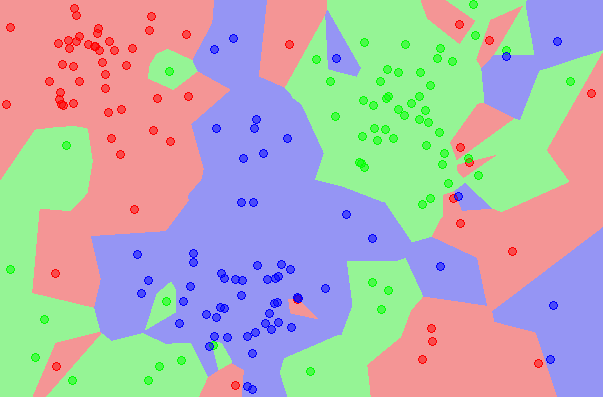

Next, we have a KNN classification map in which the K value is one. The backgound of the diagram has been coloured red for all areas where all the nearest neighbours are red, coloured blue for all areas in which all the nearest neighbours are blue and coloured green for all areas where the nearest neighbours are green. The background colour tells us what the predicted response value would be for a new observation depending on it's X and Y features. 

#### KNN classification map (K=5)

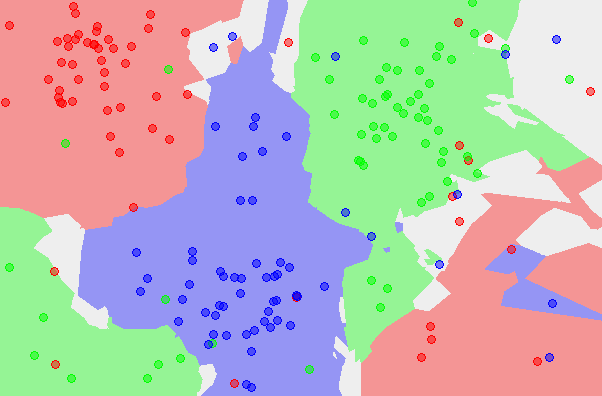

The third image is an image of a KNN classification map where the K value is 5. We can see that the boundaries between colours, known as **decision boundaires**, have changed because more neighbours are taken into account when making predictions. The white areas are areas in which KNN can't make a clear decision because there is a "tie" between two classes. KNN is a simple machine learning model, but it can make highly accurate predictions if the different classes in the dataset have varied dissimilar feature values.

In [84]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


We can see above that 'X' is a 2-dimensional array with 150 rows and 4 columns as expected and 'y' is a 1-dimensional array with length 150 since there is one response value for each observation.

### Scikit-learn 4-step modeling pattern

**Step 1:** Import the class you plan to use.

This is the actual machine learning process. Scikit-learn provides a uniform interface to machine learing models, and there is a common pattern that can be reused across different models. The first step in this pattern is to import the relevant class. In this case we use:

In [85]:
from sklearn.neighbors import KNeighborsClassifier

**Step 2:** "Instantiate" the "estimator".

Scikit-learn referes to its models as "estimators" because their primary role is to estimate unknows quantities. This process is called "instantiation" because we are creating an instance of the KNeighborsClassifier class.

In [86]:
knn = KNeighborsClassifier(n_neighbors=1)

We have now created an instance of the KNeighborsClassifier class and called it knn. We now have an object called knn that knows how to do K-nearest neighbours classification, and it's just waiting for us to give us some data. Now
we need to tell the knn object that when it runs the K-nearest neighbours algorithm it should be looking for one nearest neighbour. Here, I specified the argument n=1. N Neighbours is known as a tuning parameter or a "hyperparameter".

**Step 3:** Fit the model with data (aka "model training")

This is the model training step in which the model learns the relationship betweeen the features and the response. I used the **"fit method"** on the knn object and passed through two arguments. The feature matrix "X" and the response vector "y".

In [87]:
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

This operation occurs in place, which is why we don't need to need to assign the results to another object.

**Step 4:** Predict the response for a new observation.

This is the final step and it is to make predictions for new observations. We will input the measurements for an unknown Iris and ask the fitted model to predict the Iris species based on what it has learned in the previous step. We'll use the **predict method** on the knn object and pass through the features of the unknown Iris as a python list. It will be expecting a **NumPy array**, but it will still work with a list since NumPy will automatically convert it to an array of the appropriate shape.

In [88]:
knn.predict([[3, 5, 4, 2]])

array([2])

The predict method returns a NumPy array with the predicted response value. In this case, the K-Nearest Neighbours algorithm using K=1 predicts a response value of 2. Scikit-learn doesn't know what this 2 represents, so we need to keep track of the fact 2 was the encoding for Virginica. Virginica is the predicted species for the unknown Iris. This predict method can be used on multiple observations at once. I'm going to create a list of lists called called `X_new` which contains 2 new observations. When we pass `X_new` through the predict method, it again gets converted to a NumPy array but this time with a shape of (2, 4) which is interpreted as 2 observations with 4 features each.

In [89]:
X_new = [[3, 5, 4, 2], [5, 4, 3, 2]]
knn.predict(X_new)

array([2, 1])

The predict method returns a NumPy array with values 2 and 1, which means that the prediction for the first unknown Iris was a 2 (Virginica) and the prediction for the second unknows Iris was a 1 (Versicolor).

#### Using a different value for K

I then tried KNN with k=5. This is known as **model tuning**, which means we are varying the arguments that we pass through the model. Note that we don't have to import the class again, we just instantiate the model with the arguement `n_neighbors=5`, fit the model with the data and make predictions. This time, the model predicts the value 1 for both unknown Irises. 

In [90]:
# instantiate the model (using the value K=5)
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model with data
knn.fit(X, y)

# predict the response for new observations
knn.predict(X_new)

array([1, 1])

A great thing about Scikit-learn is that it's models have a uniform interface which means that we can use the same 4 step pattern on a different model with reletive ease. I tried **logistic regression**, which, despite its name, is another model used for **classification**. We simply import `logisticRegression` from the `linear_model` module, **instantiate** the model with all of the default parameters, **fit** the model with data, and make predictions.

In [91]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear')

logreg.fit(X, y)

logreg.predict(X_new)

array([2, 0])

This time, the model has predicted a value of 2 for the first unknown Iris, and a value of 0 for the second unknown Iris. So which model produced the correct predictions for these 2 unknown Irises? The answer is that we don't know because these are out of sample observations, meaning that we don't know the true response values. As I said earlier, our goal with supervised learning is to build models that generalise to new data. However, we often aren't able to truly measure how well our models will perform on out of sample data. Does that mean that we are forced to just guess how well our models are likely to do? The answer to this is no.

### Evaluation procedure #1: Train and test on the entire dataset

This is where we Train the model on the entire dataset, and then test the model by checking how well it performs on that same data. This appears to solve our original problem which was that we made some predictions, but we couldn't check if those predictions were correct. By testing our model on a dataset where we do know the **true** response values, we can check how well our model is doing by comparing the **predicted** response values with the **true** response values. Let's start by reading in the Iris data and then creating our feature matrix `X` and and our response vector y.

In [92]:
X = iris.data
y = iris.target

In [93]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear')

logreg.fit(X, y)

logreg.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

We'll start with Logistic Regression. Again we import the class, intantiate the model, and fit the model with the training data. Then we make our predictions by passing the entire feature matrix X to the predict method of the fitted model and print out those predictions. We then store those predictions in an object called y_pred. As we can see, it made 150 predictions, one prediction for each observation.

In [94]:
# store the predicted response values
y_pred = logreg.predict(X)

# check how many predictions were generated
len(y_pred)

150

### Classification accuracy:

Now we need a numerical way to evaluate how well the model performed. We'll use the metrics module from scikit-learn. First, we import the metrics module, then we use the accuracy score funcion and pass it the true response values followed by the predicted response values.

In [95]:
from sklearn import metrics
print(metrics.accuracy_score(y, y_pred))

0.96


It returns a value of 0.96. This means that it compared the 150 true responses with the corresponding 150 predicted responses and calculated that 96% of our predictions were correct. This is known as our training accuracy because we are testing the model on the same data we used to train the model. We'll now try KNN using the value k=5. We import the class, instantiate the model using the argument n_neighbours=5, fit it with the training data, make predictions on the same data, and calculate the classification accuracy.

#### KNN (K = 5)

In [96]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.9666666666666667


This time we get 0.967 which is slightly better than logistic regression. Finally we'll try KNN=1.

#### KNN = 1

In [97]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

1.0


This time we get a score of 1.0 or 100% accuracy. It performed even better than the other 2 models, and so we would conclude that KNN with k=1 is the best model to use with this data. However, this is misleading. We can see exactly why the KNN model with k=1 would always have 100% training accuracy: To make a prediction for any observation in the training set, KNN searches for the 1 nearest observation in the training set and it would find that exact same observation the second time. KNN has memorised the training set and because we are training on the exact same data it will always make correct predictions. At this point we can conclude that training and testing the models on the same data is not a useful procedure for deciding which model to choose. The goal here is to estimate how well each model is likely to perform on out of sample data. If what we try to maximise is training accuracy, then we're rewarding overly complex models that won't necessarily do well with out of sample data. Creating an unnecessarily complex model is known as overfitting. Models that overfit have learned to identify the noise in the data rather than the signal. In the case of KNN, a very low value of k creates a high complexity model because it follows the noise in the data. The below diagram explains overfitting.

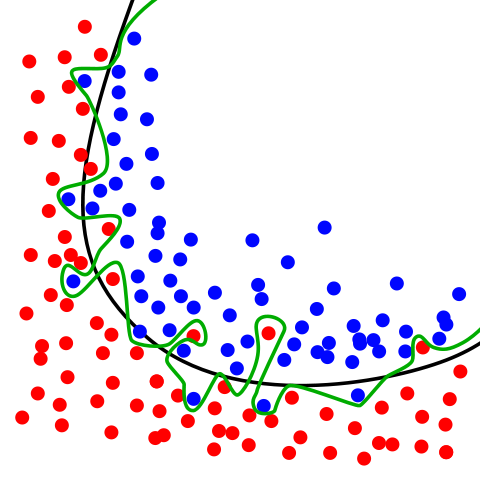

Each point represents and observation. The X and Y locations represent its feature values and the colour represents the response class. For a classification problem, you want the model to learn that the black line or decision boundary for classifying future observations as red or blue. It won't do a perfect job classifying the training observations but it is likely to do a great job classifying out of sample data. A model that learns the green line as the decision boundary is overfitting the data. It does a great job classifying the training observations, but it won't do as well as the black line when classifying out of sample data. The green line has learned the noise in the signal but the black line has learned the signal. Since training and testing on the same data is not optimal as an evaluation procedure we'll need a better one. The next one we'll look at is called train-test-split.

### Evaluation procedure #2: Train/test split

First we split the data into 2 pieces, a training set and a testing set. We train the model on the training set and then we test the model on the testing set to evaluate how well it did. Because we are evaluating the model on data that was not used to train the model, we're more accurately simulating how well a model is likely to perform on out of sample data. Let's apply this procedure to the iris data. To spit the data into training and testing sets we'll use scikit-learn's built in train_test_split function. We'll import it and use the command to split the X and y objects into 2 peices each.

In [98]:
# STEP 1: split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

Basically what we are doing here is splitting the 150 samples into training data and out of sample data. Since we're training and testing the model on different sets of data, the resulting accuracy is a better estimate of how well the model is likely to perform on future data.  In this case I assigned 40% of the observatoins to the testing set, and so 60% will be assigned to the training set. There's no general rule for what percentage is best, but it is common to use between 20-40% for testing. In terms of how the observations are assigned, it's a random process. If we were to run this function again, it would split the data differently. We could use a parameter called random_state and give it a value to seed the dataset everytime. I used random_state=4. Let's check the shapes of these 4 objects and make sure that they match our expectations.

In [99]:
print(X_train.shape)
print(X_test.shape)

(90, 4)
(60, 4)


We can see that the original X of 150x4 has been split into 2 pieces in which X_train is size 90x4 and X_test is size 60x4.

In [100]:
print(y_train.shape)
print(y_test.shape)

(90,)
(60,)


The original y of size 150 has also been split into 2 pieces in which y_train is size 90 and y_test size is 60.

#### STEP 2: Train the model on the training set
Step 2 is to instantiate a regression model and fit it to X_train and y_train.

In [101]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

#### STEP 3: Make predictions on the testing set
Step 3 is to make predictions for the observations in the testing set by passing X_test to the predict method and storing the results in y_pred. Since we know the true response values for the testing set, we can compare the predicted values with the actual values stored in y_test. 

In [102]:
y_pred = logreg.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

0.9333333333333333


We can see that this model achieved a testing accuracy of 93%.

Let's repeat steps 2 and 3 for our KNN models with k=5 and k=1
#### Repeat for KNN with K=5

In [103]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9666666666666667


For k=5, we achieve a testing accuracy of 97%.

#### Repeat for KNN with K=1

In [104]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.95


For k=, we achieve a testing accuracy of 95%.

We would conclude that out of these 3 models, KNN with k=5 is likely to be the best model for making predictions on out of sample data.

### Can we find an even better value for k?
I've written a for loop to do that. I try every value of k from 1 to 25 and then record KNN's testing accuracy in a python list called scores. I then used matplotlib to plot the relationship between the value of X and the testing accuracy. 

In [105]:
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

(0.94, 1.0)

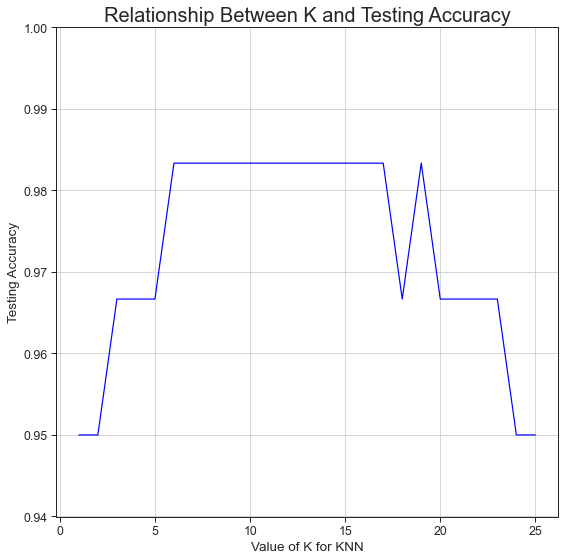

In [106]:
plt.figure(figsize = (9,9))
plt.title ("Relationship Between K and Testing Accuracy", fontsize = 20)
plt.plot(k_range, scores, 'b')
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.grid()
plt.ylim(0.94,1)

In general, as the value of k increases, there is a rise in the testing accuracy and then a fall. This is quite typical when examining the relationship between model complexity and testing accuracy. As said earlier, training accuracy rises as model complexity increases, and the model complexity for KNN is determined by the value of k. On the other hand, testing accuracy penalises models that are too complex and models that are not complex enough. Therefore you'll see maximum testing accuracy when the model has the right level of complexity. Here, we see that the highest accuracy from k=6 to k=17, so we can conclude that a k value in that range would be better than k=5. However, since this dataset it quite small and this is also an easy classification task, it's hard to reliably say that the behaviour that we see here in this plot will generalise. Regardless, plotting testing accuracy vs model complexity is a very useful way to tune any parameters that relate to model complexity. 

### Making predictions on out of sample data
Once we've chosen a model and the optimal paramets and we're ready to make predictions on out of sample data, we need to retrain the model on all of the available training data, otherwise we would be throwing away valuable training data. In this case, we'll choose a value of 11 for k since it's in the middle of the k-range with the highest testing accuracy. This is our best model. We instantiate the KNN model with n_neighbours=11, we fit the model with X and y, and we use the model to make a prediction.

In [107]:
knn = KNeighborsClassifier(n_neighbors=11)

knn.fit(X, y)

knn.predict([[3, 5, 4, 2]])

array([1])

The model has predicted that the Iris species is Versicolor.

### Conclusion and the Downsides of train/test split
Train/test split provides a high variance estimate of out of sample accuracy, meanging that it can change a lot depending on which observations happen to be in the training set vs the testing set. There is an alternative model evaluation procedure called **K-fold cross-validation** that overcomes this limitation by repeating the train/test split process multiple times in a systematic way and averaging the results. Regardless, train/test split remains a useful procedure because of its flexibility and speed. **K-fold cross-validation** goes beyond the scope of this project but if I was to to do some more research into machine learning this is where I would go next.

## References

https://www.w3schools.com/python/numpy_intro.asp
https://www.w3schools.com/python/pandas/default.asp
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html
https://www.ntirawen.com/2018/09/iris-dataset-prediction-in-machine.html
http://seaborn.pydata.org/generated/seaborn.FacetGrid.html
https://sklearn.org/
https://numpy.org/devdocs/user/whatisnumpy.html
https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python
https://matplotlib.org/
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html
https://seaborn.pydata.org/introduction.html
https://en.wikipedia.org/wiki/Scikit-learn
https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html
https://pandas.pydata.org/docs/getting_started/intro_tutorials/05_add_columns.html
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.size.html
https://www.kite.com/python/docs/seaborn.pairplot
https://www.geeksforgeeks.org/how-to-create-a-seaborn-correlation-heatmap-in-python/